In [ ]:
#!jupyter kernelspec list

# CarDD test imageset

In [ ]:
#load data
import itertools
from prompt_inference_utils import evaluate_batch
import pandas as pd
from load_dataframe import create_image_caption_dataset

image_folder = "/workspace/flickr30test/Test_data/test_dataset"
captions_json = "/workspace/flickr30test/Test_data/test_set.json"

test_dataset = create_image_caption_dataset(image_folder, captions_json)
print(test_dataset.head())

In [ ]:
prompt_set = ["", 
              "Describe &&damage 12 sedan drive’ this !!image.",
               "an image of...", 
               "Explain the visible damage to this vehicle. Question: What areas are affected and how severe is the damage? Answer:",
               "You are an insurance claims assessor. Provide a detailed description of the car’s condition.",
               "This \<part\_1> of the car has \<damage_type\_1> . The severity appears to be \<severity\_1>. Additional notes: \<text\_1>.",
               "Describe the damage in the following format – Damage Type: \_\_\_; Affected Part: \_\_\_; Severity: \_\_\_; Notes: \_\_\_"
               ]
PROMPT_LIST = [prompt_set for i in range(10)]


In [ ]:
samples = [3,5,7,9,12,13,22,24,35,38]

# Set this to false for the CarDD dataset
multiple_refs = False

dfs = evaluate_batch(PROMPT_LIST,test_dataset,samples, multiple_refs)

# Flickr30k prompt testing

In [ ]:
import itertools
from prompt_inference_utils import evaluate_batch
import pandas as pd
from datasets import load_dataset
import json 
with open('/workspace/dataset_flickr30k.json', 'r') as f:
    json_data = json.load(f)

image_entries = json_data['images']
test_filenames = [image['filename'] for image in image_entries if image['split'] == 'test'][:50]

flickr30k_test = load_dataset("nlphuji/flickr30k", split="test")
test_dataset = flickr30k_test.filter(lambda example: example['filename'] in test_filenames)

print("Filtered test Dataset:")
print(test_dataset)

In [2]:
prompt_set_0 = ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a nature trail guide. Describe what’s happening in this scene to someone preparing for their first family hike.",
               "There is a <text_1> walking on a <text_2> in this image.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_1= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a food critic observing customer service at cafes. Describe the interaction happening in this scene.",
               "A <text_1> is standing beside a <text_2> who is sitting down at a table.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_2= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a weather reporter documenting children’s routines during rainy mornings. Describe what’s going on in this image.",
               "<text_1> are walking with <text_2> in the rain.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_3= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a journalist covering a small-town parade. Describe the role and setting of the clown in this festive scene.",
               "A <text_1> with bright makeup and colorful clothes stands near a <text_2> during an event.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_4= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a winter sports photographer recounting a joyful moment you captured. Describe the scene with vivid detail.",
               "Two <text_1> are sitting on a snowy slope with their arms <text_2>.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_5= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a market researcher documenting traditional grocery stores. Describe what the boy is doing and what the store looks like.",
               "A <text_1> is behind a counter filled with <text_2> in a small shop.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_6= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are an IT workplace culture analyst. Describe the work environment and team dynamic shown in this image.",
               "A <text_1> is using a laptop at a desk while two <text_2> are in the background.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_7= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a canine trainer assessing a working dog’s field behavior. Describe the dog’s posture and role based on the scene..",
               "A <text_1> is wearing a vest and holding a <text_2> in its mouth.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_8= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a cultural anthropologist documenting traditional street labor. Describe what the person is doing and how they are carrying the items.",
               "A <text_1> is walking while carrying <text_2> suspended from a pole.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
prompt_set_9= ["", 
              "How many people are playing soccer in this scene?",
               "An image of...", 
               "You are a museum docent giving a tour. Describe the activity of the woman in the context of the art gallery.",
               "A <text_1> is painting a replica of an artwork in front of <text_2>.",
               "Describe using format - Subject:  \_\_\_; Activity:  \_\_\_; Environment:  \_\_\_; Additional Notes: \_\_\_;"
               ]
PROMPT_LIST = [prompt_set_0, prompt_set_1, prompt_set_2, prompt_set_3, prompt_set_4, prompt_set_5, prompt_set_6, prompt_set_7, prompt_set_8, prompt_set_9]


In [ ]:
samples = [2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509]

multiple_refs = True

dfs = evaluate_batch(PROMPT_LIST,flickr30k_test,samples, multiple_refs)

In [ ]:
# run mkdir /workspace/output
for i, df in enumerate(dfs, start=1):
   filename = f"/workspace/output/prompt{i}.csv"
   df.to_csv(filename, index=False)
   print(f"✅ Saved: {filename}")

In [ ]:
for i, df in enumerate(dfs, start=1):
    avg_cider = df["CIDEr"].mean()
    avg_spice = df["SPICE"].mean()
    avg_meteor = df["METEOR"].mean()
    avg_cos_sim = df["semantic_similarity"].mean()
    
    print(f"Prompt{i}: CIDEr={avg_cider:.4f}, SPICE={avg_spice:.4f}, METEOR={avg_meteor:.4f}, CosineSim={avg_cos_sim:.4f}")


# CarDD output for Qwen finetune
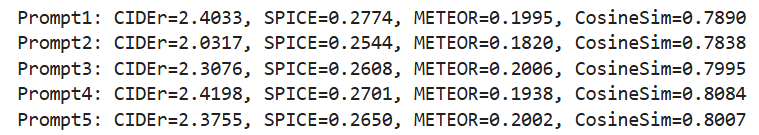

# CarDD output for Pixtral finetune
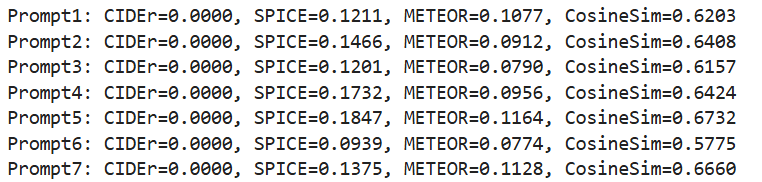

# flickr30k with qwen 
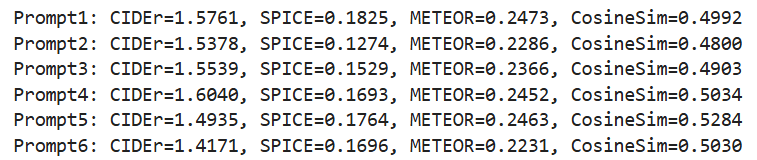